### parse_dates将指定的内容解析为日期，Dates作为列名

In [21]:
import pandas as pd
clos = ['Time', 'Action', 'User', 'Product', 'Quantity', 'Price']
orders = pd.read_csv('Data/purchase_order.tab', sep='\t',parse_dates={'Dates' : [0]}, names=clos, encoding='utf-8')
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54772 entries, 0 to 54771
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Dates     54772 non-null  datetime64[ns]
 1   Action    54772 non-null  object        
 2   User      54772 non-null  object        
 3   Product   54772 non-null  object        
 4   Quantity  54772 non-null  int64         
 5   Price     54721 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(3)
memory usage: 2.5+ MB


In [22]:
orders.head()

,Dates,Action,User,Product,Quantity,Price
0,2015-07-01 00:00:01,order,U312622727,P0006944501,1,1069.0
1,2015-07-01 00:00:03,order,U239012343,P0006018073,1,1680.0
2,2015-07-01 00:00:19,order,U10007697373,P0002267974,1,285.0
3,2015-07-01 00:01:10,order,U296328517,P0016144236,1,550.0
4,2015-07-01 00:01:36,order,U300884570,P0014516980122,1,249.0


In [23]:
orders['Product'].head()

0       P0006944501
1       P0006018073
2       P0002267974
3       P0016144236
4    P0014516980122
Name: Product, dtype: object

In [26]:
orders[orders['Product']=='P0006944501']['Price'].describe()

count       8.0
mean     1069.0
std         0.0
min      1069.0
25%      1069.0
50%      1069.0
75%      1069.0
max      1069.0
Name: Price, dtype: float64

In [31]:
orders[orders['Product']=='P0000005913']['Price'].mean()

1590.0

In [28]:
orders['Product'].unique()

array(['P0006944501', 'P0006018073', 'P0002267974', ..., 'P0022884606',
       'P0013911085', 'P0025123755'], dtype=object)

In [29]:
len(orders['Product'].unique())

20054

In [30]:
orders.groupby('Product')['Price'].mean().head()

Product
P0000005913       1590.0
P0000006020       1290.0
P0000006591        999.0
P0000007744       3280.0
P0000008190011    5083.0
Name: Price, dtype: float64

### 每个product所发的平均价格从高排到低

In [32]:
orders.groupby('Product')['Price'].mean()\
.sort_values(ascending=False).head()

Product
P0000143511    438888.0
P0000143500    438888.0
P0006584093    320000.0
P0025280275    183900.0
P0000150006    111375.0
Name: Price, dtype: float64

In [33]:
orders['Total_Price'] = orders['Quantity'] * orders['Price']
orders

,Dates,Action,User,Product,Quantity,Price,Total_Price
0,2015-07-01 00:00:01,order,U312622727,P0006944501,1,1069.0,1069.0
1,2015-07-01 00:00:03,order,U239012343,P0006018073,1,1680.0,1680.0
2,2015-07-01 00:00:19,order,U10007697373,P0002267974,1,285.0,285.0
3,2015-07-01 00:01:10,order,U296328517,P0016144236,1,550.0,550.0
4,2015-07-01 00:01:36,order,U300884570,P0014516980122,1,249.0,249.0
...,...,...,...,...,...,...,...
54767,2015-07-30 23:58:53,order,U18517004,P0006036273,1,2899.0,2899.0
54768,2015-07-30 23:59:24,order,U217552746,P0010409991,1,253.0,253.0
54769,2015-07-30 23:59:33,order,U395036534,P0025123755,1,690.0,690.0
54770,2015-07-30 23:59:37,order,U14085643,P0009890670031,1,245.0,245.0


### 每个用户花的钱从高到低

In [34]:
orders.groupby('User')['Total_Price'].sum().sort_values(ascending=False).head()

User
U166708333      2942744.0
U10120098943    1451117.0
U142809250       747550.0
U1006283751      515688.0
U10114715330     456782.0
Name: Total_Price, dtype: float64

In [37]:
import pandas
m_cols = ['Time','Action','User','Product']
views = pd.read_csv('Data/purchase_view.tab',sep='\t',parse_dates={'Date':[0]},names=m_cols,encoding='utf-8')
views.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1191486 entries, 0 to 1191485
Data columns (total 4 columns):
 #   Column   Non-Null Count    Dtype         
---  ------   --------------    -----         
 0   Date     1191486 non-null  datetime64[ns]
 1   Action   1191486 non-null  object        
 2   User     1191485 non-null  object        
 3   Product  1191486 non-null  object        
dtypes: datetime64[ns](1), object(3)
memory usage: 36.4+ MB


In [38]:
views.head()

,Date,Action,User,Product
0,2015-07-01 00:00:01,view,U129297265,P0023468384
1,2015-07-01 00:00:03,view,U321001337,P0018926456
2,2015-07-01 00:00:05,view,U10070718237,P0000063593
3,2015-07-01 00:00:05,view,U393805241,P0005541535
4,2015-07-01 00:00:10,view,U10004621134,P0022135540


In [45]:
orders_cnt = orders.groupby(['User','Product'])['Product'].count().reset_index(name='buys')

In [44]:
views_cnt = views.groupby(['User', 'Product'])['Product']\
.count().reset_index(name='views')
views_cnt.head()

,User,Product,views
0,U10000000225,P0007107111,1
1,U10000000225,P0007107122,1
2,U10000000225,P0007107413,1
3,U10000000225,P0009440001,1
4,U10000000225,P0009680484,1


In [46]:
orders_cnt.tail()

,User,Product,buys
50376,U9373028331,P0003951382,1
50377,U9373046357,P0005572361,1
50378,U9373046357,P0006621060062,1
50379,U9373066427,P0007263330093,1
50380,U9373068346,P0003177856,1


### 两表连接
#### 采用右连接，用大的来合并小的，防止遗漏，views_cut在右边，又大所以是右连接

In [47]:
merge_df = pd.merge(orders_cnt, views_cnt, on=['User','Product'], how='right')
merge_df.head()

,User,Product,buys,views
0,U10000000225,P0007107111,NaN,1
1,U10000000225,P0007107122,NaN,1
2,U10000000225,P0007107413,NaN,1
3,U10000000225,P0009440001,NaN,1
4,U10000000225,P0009680484,NaN,1


#### 在dt后可以去日期格式的年，月，日等

In [50]:
views['Date'].dt.year.head()

0    2015
1    2015
2    2015
3    2015
4    2015
Name: Date, dtype: int32

#### 某一日的浏览量

In [52]:
views_cnt_by_date  = views.groupby(views['Date'].dt.date)['Action'].count()
views_cnt_by_date.head()

Date
2015-07-01    24569
2015-07-02    17043
2015-07-03    28041
2015-07-04    28625
2015-07-05    15522
Name: Action, dtype: int64

#### 谁的什么，两个变量，用groupby---df.groupby(谁)[什么]

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


<Axes: xlabel='Date'>

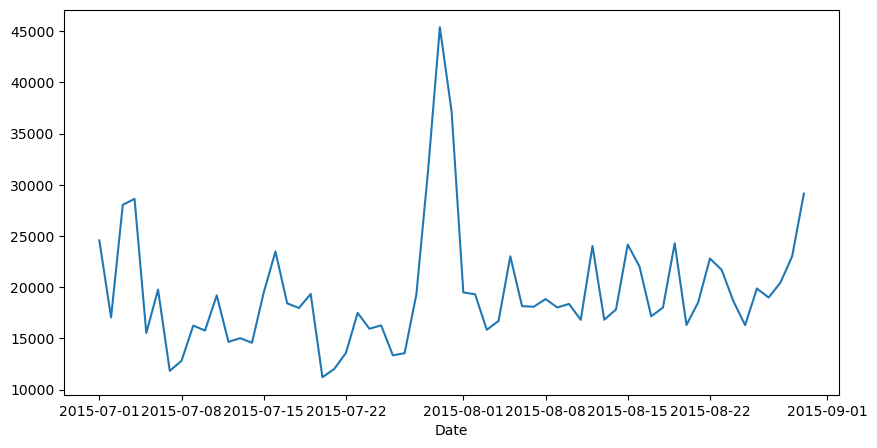

In [53]:
%pylab inline

views_cnt_by_date.plot(kind='line', figsize=[10,5])

<Axes: title={'center': 'view count by hour'}, xlabel='Date'>

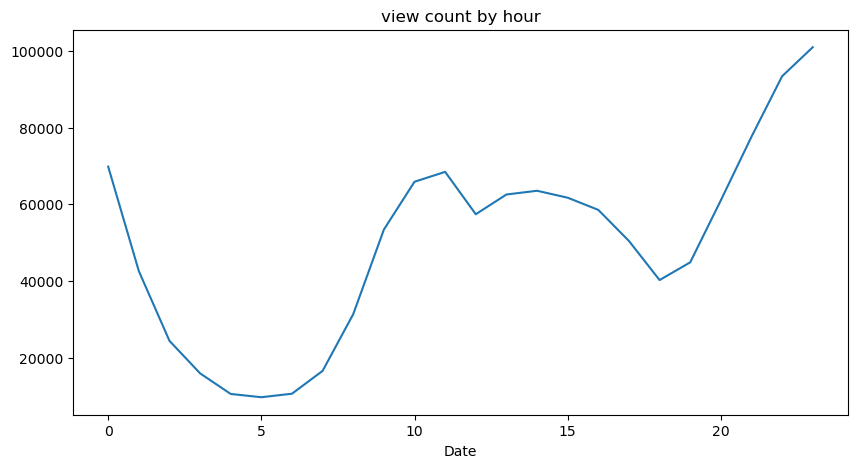

In [55]:
views_cnt_by_hour  = views.groupby(views['Date'].dt.hour)['Action'].count()
views_cnt_by_hour.plot(kind='line', title = 'view count by hour', figsize=[10,5])

<Axes: xlabel='User'>

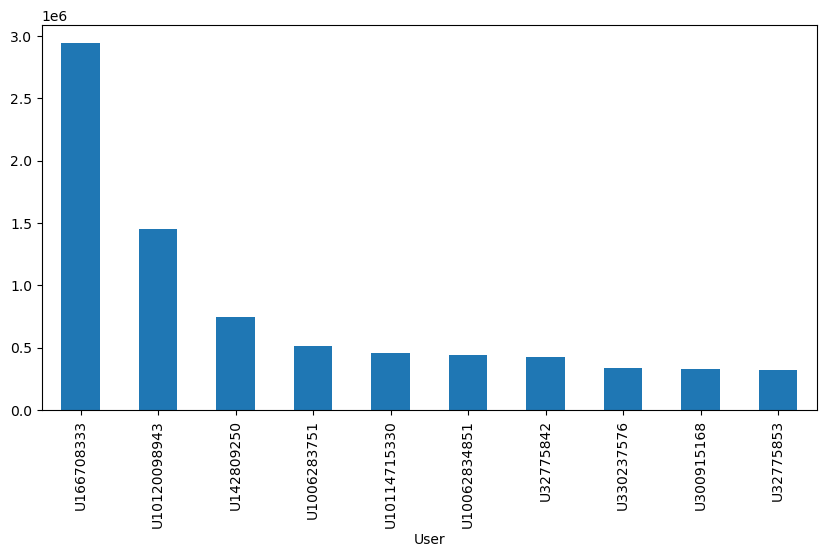

In [56]:
orders['Total_price'] = orders['Quantity'] * orders['Price']
g = orders.groupby('User')['Total_price'].sum().sort_values(ascending=False)[0:10]
g.plot(kind="bar", figsize=[10,5])

In [58]:
view_daily_cnt = views.groupby(by=views['Date'].dt.date)['Action'].count()
orders_daily_cnt = orders.groupby(by=orders['Dates'].dt.date)['Action'].count()
view_daily_cnt.head()

Date
2015-07-01    24569
2015-07-02    17043
2015-07-03    28041
2015-07-04    28625
2015-07-05    15522
Name: Action, dtype: int64

#### 两列连接

In [59]:
df = pd.concat([view_daily_cnt, orders_daily_cnt], axis=1)
df.dropna(inplace=True)
df.columns = ['Views', 'Orders']
df.head()

,Views,Orders
2015-07-01,24569,2324.0
2015-07-02,17043,2059.0
2015-07-03,28041,1778.0
2015-07-04,28625,2166.0
2015-07-05,15522,1413.0


#### rot旋转字体

<Axes: >

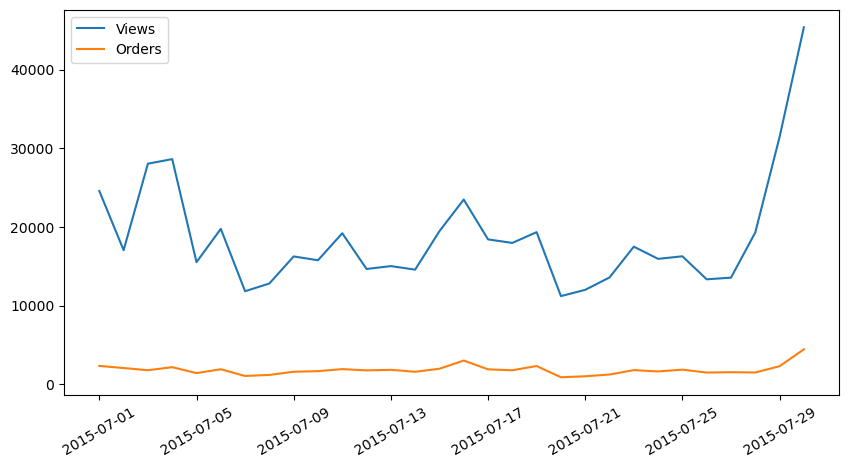

In [60]:
df.plot(kind="line", figsize=[10,5], rot=30)

<Axes: >

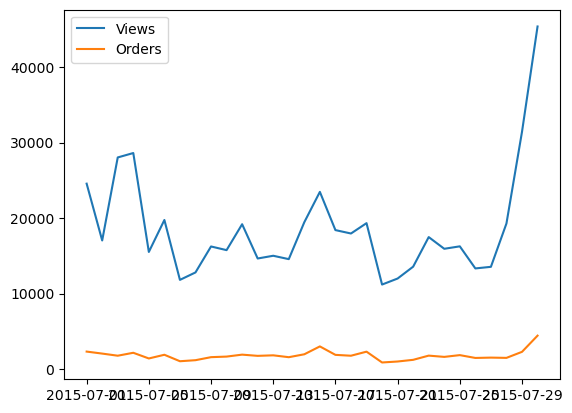

In [61]:
df[['Views','Orders']].plot(kind='line')